In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
# Any results you write to the current directory are saved as output.

In [2]:
data1=pd.read_csv('../input/titanic/train.csv')
data2=pd.read_csv('../input/titanic/test.csv')
data3=pd.read_csv('../input/titanic/gender_submission.csv')

In [3]:
print(data1.isnull().sum())
data2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [4]:
data1.drop(['Name'],axis=1,inplace=True)
data2.drop(['Ticket'],axis=1,inplace=True)
data2.drop(['Name'],axis=1,inplace=True)
data1.drop(['Ticket'],axis=1,inplace=True)
data1.head(6)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
5,6,0,3,male,NaN,0,0,8.4583,NaN,Q


In [5]:
data1['Age']=data1['Age'].fillna(data1['Age'].mode()[0])
data2['Age']=data2['Age'].fillna(data2['Age'].mode()[0])

In [6]:
my_imputer=SimpleImputer(strategy='most_frequent')
imptrain=pd.DataFrame(my_imputer.fit_transform(data1))
imptest=pd.DataFrame(my_imputer.fit_transform(data2))
imptrain.columns=data1.columns
imptest.columns=data2.columns
data1=imptrain.copy()
data2=imptest.copy()

In [7]:
y=data1['Survived']
data1.drop(['Survived'],axis=1,inplace=True)

In [8]:
encoder_mod=LabelEncoder()
ltrain=data1.copy()
ltest=data2.copy()
s=(data1.dtypes=='object')
obj_col=list(s[s].index)

In [9]:
for col in obj_col:
    ltrain[col]=encoder_mod.fit_transform(data1[col].astype(str))
    ltest[col]=encoder_mod.fit_transform(data2[col].astype(str))

In [10]:
xtrain,xvalid,ytrain,yvalid=train_test_split(ltrain, y, test_size=0.33, random_state=42)

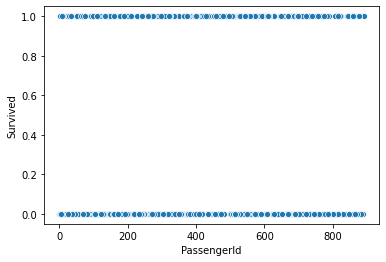

In [11]:
sns.scatterplot(x=xtrain['PassengerId'],y=ytrain)

In [12]:
ytrain=ytrain.astype('int') 
logreg=LogisticRegression()
logreg.fit(xtrain,ytrain)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
yvalid=yvalid.astype('int')
y_pred = logreg.predict(xvalid)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(xvalid, yvalid)))

Accuracy of logistic regression classifier on test set: 0.80


In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(yvalid, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(yvalid, y_pred))

[[150  25]
 [ 35  85]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       175
           1       0.77      0.71      0.74       120

    accuracy                           0.80       295
   macro avg       0.79      0.78      0.79       295
weighted avg       0.80      0.80      0.80       295



In [15]:
ytest=logreg.predict(ltest)

In [16]:
id =np.array(ltest["PassengerId"]).astype(int)
my_solution = pd.DataFrame(ytest,id, columns = ["Survived"])
print(my_solution)

     Survived
310         0
311         0
312         0
313         0
314         0
..        ...
305         0
306         1
307         0
308         0
309         0

[418 rows x 1 columns]


In [17]:
my_solution.to_csv("solution_one.csv", index_label = ["PassengerId"])